***
<h1 id="heading"><center><span style="background-color:#5642C5; color:white ; display:fill;border-radius:5px; font-family:cursive"> Date fruit classification 📊🔬</span></center><a class="anchor-link" href="">¶</a></h1>
<p><center style="color:#159364; font-family:cursive;">The best way to make yourself extremely valuable in a team is to understand everything, but being a master of something.</center></p>

***


<blockquote><p style="font-size:16px; color:#159364; font-family:verdana;">💬 From the start, I would like to take this opportunity to remind everyone to be <code>kind</code>, <code>just</code> and <code>mindful</code>😃</p></blockquote>

<h3 id="heading"><span style="background-color:#cefffb; color:#1b4946; display:fill;border-radius:5px; font-family:cursive"> 👨‍💻 Description of the Problem</span></h3>

* Describe the problem ahead
* Describe the datasets and why you chose it and how it will solve the problem above.
* 

__DATASET__: https://www.muratkoklu.com/datasets/

__Citation Request__ :
KOKLU, M., KURSUN, R., TASPINAR, Y. S., and CINAR, I. (2021). Classification of Date Fruits into Genetic Varieties Using Image Analysis. Mathematical Problems in Engineering, Vol.2021, Article ID: 4793293, DOI:10.1155/2021/4793293
https://www.hindawi.com/journals/mpe/2021/4793293/

__Abstract__: A great number of fruits are grown around the world, each of which has various types. The factors that determine the type of fruit are the external appearance features such as color, length, diameter, and shape. The external appearance of the fruits is a major determinant of the fruit type. Determining the variety of fruits by looking at their external appearance may necessitate expertise, which is time-consuming and requires great effort. The aim of this study is to classify the types of date fruit, that are, Barhee, Deglet Nour, Sukkary, Rotab Mozafati, Ruthana, Safawi, and Sagai by using three different machine learning methods. In accordance with this purpose, 898 images of seven different date fruit types were obtained via the computer vision system (CVS). Through image processing techniques, a total of 34 features, including morphological features, shape, and color, were extracted from these images. First, models were developed by using the logistic regression (LR) and artificial neural network (ANN) methods, which are among the machine learning methods. Performance results achieved with these methods are 91.0% and 92.2%, respectively. Then, with the stacking model created by combining these models, the performance result was increased to 92.8%. It has been concluded that machine learning methods can be applied successfully for the classification of date fruit types.

<h3 id="heading"><span style="background-color:#cefffb; color:#1b4946 ; display:fill;border-radius:5px; font-family:cursive"> 📥 Import packages & data </span></h3>

In [1]:
# if you have a recent panda library, then it most likely the default engine for reading xlsx files is openpyxl
# to install it in your environment, you can uncomment the next line of code.
# ! pip install openpyxl

In [81]:
import pandas as pd
import numpy as np
from scipy import stats
import os

import matplotlib.pyplot as plt
import matplotlib.transforms as transforms
import seaborn as sns
import plotly.express as px

import sklearn.metrics as metrics
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import LabelEncoder, StandardScaler, minmax_scale
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from collections import OrderedDict
import warnings
warnings.filterwarnings("ignore")

# The below options is useful for displaying multiple line 
pd.options.display.max_rows = None

In [3]:
# Construct the notebook path
notebook_path = os.path.abspath('.')

# Construct the full path to the data file using '..' to move up one directory
data_file_path = os.path.join(notebook_path, '..', 'data/Date_Fruit_Datasets.xlsx')

# Convert the path to its absolute form
data_file_full_path = os.path.abspath(data_file_path)

df = pd.read_excel(data_file_full_path)

<h3 id="heading"><span style="background-color:#cefffb; color:#1b4946 ; display:fill;border-radius:5px; font-family:cursive"> 🔬 Explore Overall data </span></h3>

<h4 id="heading"><span style="background-color:#fcf3b9; color:#3d3710 ; display:fill;border-radius:5px; font-family:Georgia">🔭 Viewing the data </span></h4>


In [4]:
# What is the shape of the data
print(df.shape)

(898, 35)


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 898 entries, 0 to 897
Data columns (total 35 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   AREA           898 non-null    int64  
 1   PERIMETER      898 non-null    float64
 2   MAJOR_AXIS     898 non-null    float64
 3   MINOR_AXIS     898 non-null    float64
 4   ECCENTRICITY   898 non-null    float64
 5   EQDIASQ        898 non-null    float64
 6   SOLIDITY       898 non-null    float64
 7   CONVEX_AREA    898 non-null    int64  
 8   EXTENT         898 non-null    float64
 9   ASPECT_RATIO   898 non-null    float64
 10  ROUNDNESS      898 non-null    float64
 11  COMPACTNESS    898 non-null    float64
 12  SHAPEFACTOR_1  898 non-null    float64
 13  SHAPEFACTOR_2  898 non-null    float64
 14  SHAPEFACTOR_3  898 non-null    float64
 15  SHAPEFACTOR_4  898 non-null    float64
 16  MeanRR         898 non-null    float64
 17  MeanRG         898 non-null    float64
 18  MeanRB    

<div style="display:fill;
           border-radius:5px;
           background-color:#ffdbdb;;
           font-family:Georgia;">

<p style="padding: 6px;
          color:#aa0c0c;">
📌 Our target is try to find how those columns feature has impact of buying a bike or not.
</p>
</div>

In [6]:
df.head()

AREA  PERIMETER  MAJOR_AXIS  MINOR_AXIS  ECCENTRICITY   EQDIASQ  \
0  422163   2378.908    837.8484    645.6693        0.6373  733.1539   
1  338136   2085.144    723.8198    595.2073        0.5690  656.1464   
2  526843   2647.394    940.7379    715.3638        0.6494  819.0222   
3  416063   2351.210    827.9804    645.2988        0.6266  727.8378   
4  347562   2160.354    763.9877    582.8359        0.6465  665.2291   

   SOLIDITY  CONVEX_AREA  EXTENT  ASPECT_RATIO  ...  KurtosisRR  KurtosisRG  \
0    0.9947       424428  0.7831        1.2976  ...      3.2370      2.9574   
1    0.9974       339014  0.7795        1.2161  ...      2.6228      2.6350   
2    0.9962       528876  0.7657        1.3150  ...      3.7516      3.8611   
3    0.9948       418255  0.7759        1.2831  ...      5.0401      8.6136   
4    0.9908       350797  0.7569        1.3108  ...      2.7016      2.9761   

   KurtosisRB    EntropyRR    EntropyRG    EntropyRB  ALLdaub4RR  ALLdaub4RG  \
0      4.2287 -59191263232 -50714214400 -39922372608     58.7255     54.9554   
1      3.1704 -34233065472 -37462601728 -31477794816     50.0259     52.8168   
2      4.7192 -93948354560 -74738221056 -60311207936     65.4772     59.2860   
3      8.2618 -32074307584 -32060925952 -29575010304     43.3900     44.1259   
4      4.4146 -39980974080 -35980042240 -25593278464     52.7743     50.9080   

   ALLdaub4RB  Class  
0     47.8400  BERHI  
1     47.8315  BERHI  
2     51.9378  BERHI  
3     41.1882  BERHI  
4     42.6666  BERHI  

[5 rows x 35 columns]

In [7]:
# Let see how single row of data look like randomly
df.sample(1).iloc[0]

AREA                   398543
PERIMETER           2366.3721
MAJOR_AXIS           873.9631
MINOR_AXIS           592.5698
ECCENTRICITY            0.735
EQDIASQ              712.3488
SOLIDITY               0.9799
CONVEX_AREA            406734
EXTENT                 0.7492
ASPECT_RATIO           1.4749
ROUNDNESS              0.8944
COMPACTNESS            0.8151
SHAPEFACTOR_1          0.0022
SHAPEFACTOR_2          0.0015
SHAPEFACTOR_3          0.6644
SHAPEFACTOR_4          0.9798
MeanRR                77.8204
MeanRG                81.3717
MeanRB                82.1886
StdDevRR              21.8827
StdDevRG              21.9324
StdDevRB              23.8485
SkewRR                 0.6826
SkewRG                 1.2767
SkewRB                 0.7784
KurtosisRR              6.487
KurtosisRG             7.4728
KurtosisRB             6.7999
EntropyRR        -23266299904
EntropyRG        -25510455296
EntropyRB        -26436397056
ALLdaub4RR            38.9076
ALLdaub4RG            40.6856
ALLdaub4RB

In [8]:
# Create a list with all the column names
all_columns = df.columns.tolist()

# Remove the column ID from the list of all columns
selected_columns = [col for col in all_columns if col != 'ID']

# Select the DataFrame with the selected columns
df_selected = df[selected_columns]

In [9]:
# View the unique value for classes date in the DataFrame
print('The classes of the date fruite are:')
print(df['Class'].unique().tolist())

The classes of the date fruite are:
['BERHI', 'DEGLET', 'DOKOL', 'IRAQI', 'ROTANA', 'SAFAVI', 'SOGAY']


<span style="font-family:cursive;
             color:#ff9d91">From the info above we can see two major problems:👨‍💻</span>
- [x] We have many missing values from different columns
- [x] We have some columns that need to be integers or floats but insted they have object type (which mean string)
- [x] Some categorical columns are better to transform into integer for better analysis 

<h4 id="heading"><span style="background-color:#fcf3b9; color:#3d3710 ; display:fill;border-radius:5px; font-family:Georgia">🗄️ Missing values </span></h4>


In [10]:
# Check if any column has missing values
has_missing_values = df.isnull().any()

# Print the result
# print(has_missing_values)

# Print only the column that having missing value
columns_with_missing_values = has_missing_values[has_missing_values]
print(columns_with_missing_values)

Series([], dtype: bool)


<div style="display: inline-block;
            border-radius: 5px;
            background-color: #47985D;
            font-family: Georgia;">
    <p style="padding: 6px;
              color: #ffffff;
              font-weight: bold;
              margin: 0;">
        ✅ No missing value!.
    </p>
</div>

<h4 id="heading"><span style="background-color:#fcf3b9; color:#3d3710 ; display:fill;border-radius:5px; font-family:Georgia">🗄️ drop the target column "Class" from the DataFrame </span></h4>


In [11]:
# Check if any column has missing values
df_target = df['Class']
df_feature = df.drop('Class', axis=1)

<h4 id="heading"><span style="background-color:#fcf3b9; color:#3d3710 ; display:fill;border-radius:5px; font-family:Georgia">🗄️ Corrolation matix </span></h4>


In [12]:
numerical_stats = df_feature.describe()
numerical_stats

AREA    PERIMETER   MAJOR_AXIS  MINOR_AXIS  ECCENTRICITY  \
count     898.000000   898.000000   898.000000  898.000000    898.000000   
mean   298295.207127  2057.660953   750.811994  495.872785      0.737468   
std    107245.205337   410.012459   144.059326  114.268917      0.088727   
min      1987.000000   911.828000   336.722700    2.283200      0.344800   
25%    206948.000000  1726.091500   641.068650  404.684375      0.685625   
50%    319833.000000  2196.345450   791.363400  495.054850      0.754700   
75%    382573.000000  2389.716575   858.633750  589.031700      0.802150   
max    546063.000000  2811.997100  1222.723000  766.453600      1.000000   

          EQDIASQ    SOLIDITY    CONVEX_AREA      EXTENT  ASPECT_RATIO  ...  \
count  898.000000  898.000000     898.000000  898.000000    898.000000  ...   
mean   604.577938    0.981840  303845.592428    0.736267      2.131102  ...   
std    119.593888    0.018157  108815.656947    0.053745     17.820778  ...   
min     50.298400    0.836600    2257.000000    0.512300      1.065300  ...   
25%    513.317075    0.978825  210022.750000    0.705875      1.373725  ...   
50%    638.140950    0.987300  327207.000000    0.746950      1.524150  ...   
75%    697.930525    0.991800  388804.000000    0.775850      1.674750  ...   
max    833.827900    0.997400  552598.000000    0.856200    535.525700  ...   

           SkewRB  KurtosisRR  KurtosisRG  KurtosisRB     EntropyRR  \
count  898.000000  898.000000  898.000000  898.000000  8.980000e+02   
mean     0.250518    4.247845    5.110894    3.780928 -3.185021e+10   
std      0.632918    2.892357    3.745463    2.049831  2.037241e+10   
min     -1.029100    1.708200    1.607600    1.767200 -1.091224e+11   
25%     -0.196950    2.536625    2.508850    2.577275 -4.429444e+10   
50%      0.135550    3.069800    3.127800    3.080700 -2.826156e+10   
75%      0.593950    4.449850    7.320400    4.283125 -1.460482e+10   
max      3.092300   26.171100   26.736700   32.249500 -1.627316e+08   

          EntropyRG     EntropyRB  ALLdaub4RR  ALLdaub4RG  ALLdaub4RB  
count  8.980000e+02  8.980000e+02  898.000000  898.000000  898.000000  
mean  -2.901860e+10 -2.771876e+10   50.082888   48.805681   48.098393  
std    1.712952e+10  1.484137e+10   16.063125   14.125911   10.813862  
min   -9.261697e+10 -8.747177e+10   15.191100   20.524700   22.130000  
25%   -3.894638e+10 -3.564534e+10   38.224425   38.654525   39.250725  
50%   -2.620990e+10 -2.392928e+10   53.841300   50.337800   49.614100  
75%   -1.433105e+10 -1.660367e+10   63.063350   59.573600   56.666675  
max   -5.627727e+08 -4.370435e+08   79.828900   83.064900   74.104600  

[8 rows x 34 columns]

In [13]:
# Calculate the correlation matrix for numerical columns
correlation_matrix = df_feature.corr()
print("\nCorrelation Matrix:")
correlation_matrix


Correlation Matrix:


AREA  PERIMETER  MAJOR_AXIS  MINOR_AXIS  ECCENTRICITY  \
AREA           1.000000   0.956494    0.878893    0.954899     -0.370303   
PERIMETER      0.956494   1.000000    0.960734    0.859990     -0.166816   
MAJOR_AXIS     0.878893   0.960734    1.000000    0.721133      0.063090   
MINOR_AXIS     0.954899   0.859990    0.721133    1.000000     -0.607120   
ECCENTRICITY  -0.370303  -0.166816    0.063090   -0.607120      1.000000   
EQDIASQ        0.993243   0.959938    0.886277    0.948006     -0.335085   
SOLIDITY       0.027371  -0.133857   -0.166982    0.059613     -0.220434   
CONVEX_AREA    0.998886   0.963489    0.886948    0.951470     -0.356565   
EXTENT        -0.086286  -0.214632   -0.279951    0.028003     -0.342775   
ASPECT_RATIO  -0.095342   0.018308    0.111631   -0.150407      0.110238   
ROUNDNESS      0.044346  -0.235744   -0.355258    0.243655     -0.659626   
COMPACTNESS    0.315197   0.078554   -0.164403    0.551966     -0.917470   
SHAPEFACTOR_1 -0.124025  -0.011718    0.081976   -0.176214      0.114084   
SHAPEFACTOR_2 -0.861870  -0.934379   -0.959569   -0.736051     -0.026945   
SHAPEFACTOR_3  0.332349   0.103959   -0.136056    0.572201     -0.967224   
SHAPEFACTOR_4  0.039321  -0.036744   -0.048096   -0.004244     -0.020083   
MeanRR        -0.353447  -0.451033   -0.530236   -0.196257     -0.252334   
MeanRG        -0.380730  -0.468553   -0.538479   -0.231831     -0.238878   
MeanRB        -0.376241  -0.448371   -0.506743   -0.246280     -0.180566   
StdDevRR      -0.320764  -0.386137   -0.442289   -0.196623     -0.142801   
StdDevRG      -0.172480  -0.201908   -0.248626   -0.077724     -0.097034   
StdDevRB      -0.048223  -0.176466   -0.284034    0.095411     -0.393799   
SkewRR         0.376400   0.488147    0.551523    0.229831      0.223854   
SkewRG         0.401733   0.484734    0.550014    0.259649      0.184643   
SkewRB         0.433323   0.415364    0.412055    0.396219     -0.177619   
KurtosisRR     0.218253   0.313334    0.366579    0.093267      0.215284   
KurtosisRG     0.326335   0.398168    0.460468    0.189532      0.194135   
KurtosisRB     0.381096   0.364269    0.347940    0.354742     -0.179358   
EntropyRR     -0.359332  -0.266206   -0.146311   -0.466776      0.431537   
EntropyRG     -0.393124  -0.294308   -0.167972   -0.501442      0.463969   
EntropyRB     -0.506256  -0.416802   -0.297395   -0.585234      0.442189   
ALLdaub4RR    -0.353446  -0.451028   -0.530231   -0.196256     -0.252331   
ALLdaub4RG    -0.380747  -0.468571   -0.538497   -0.231847     -0.238875   
ALLdaub4RB    -0.376277  -0.448409   -0.506782   -0.246312     -0.180563   

                EQDIASQ  SOLIDITY  CONVEX_AREA    EXTENT  ASPECT_RATIO  ...  \
AREA           0.993243  0.027371     0.998886 -0.086286     -0.095342  ...   
PERIMETER      0.959938 -0.133857     0.963489 -0.214632      0.018308  ...   
MAJOR_AXIS     0.886277 -0.166982     0.886948 -0.279951      0.111631  ...   
MINOR_AXIS     0.948006  0.059613     0.951470  0.028003     -0.150407  ...   
ECCENTRICITY  -0.335085 -0.220434    -0.356565 -0.342775      0.110238  ...   
EQDIASQ        1.000000  0.018777     0.993397 -0.112353     -0.157370  ...   
SOLIDITY       0.018777  1.000000    -0.016449  0.392552     -0.189234  ...   
CONVEX_AREA    0.993397 -0.016449     1.000000 -0.107403     -0.095457  ...   
EXTENT        -0.112353  0.392552    -0.107403  1.000000      0.067207  ...   
ASPECT_RATIO  -0.157370 -0.189234    -0.095457  0.067207      1.000000  ...   
ROUNDNESS      0.035564  0.611010     0.015083  0.470357     -0.410407  ...   
COMPACTNESS    0.301535  0.384826     0.297794  0.365187     -0.422474  ...   
SHAPEFACTOR_1 -0.186715 -0.188307    -0.124221  0.072829      0.999515  ...   
SHAPEFACTOR_2 -0.887398  0.047237    -0.865527  0.216175     -0.055882  ...   
SHAPEFACTOR_3  0.304564  0.367759     0.313861  0.394855     -0.243065  ...   
SHAPEFACTOR_4  0.037291  0.874596     0.005152  0.229890     -0.134463  ...   
MeanRR        -

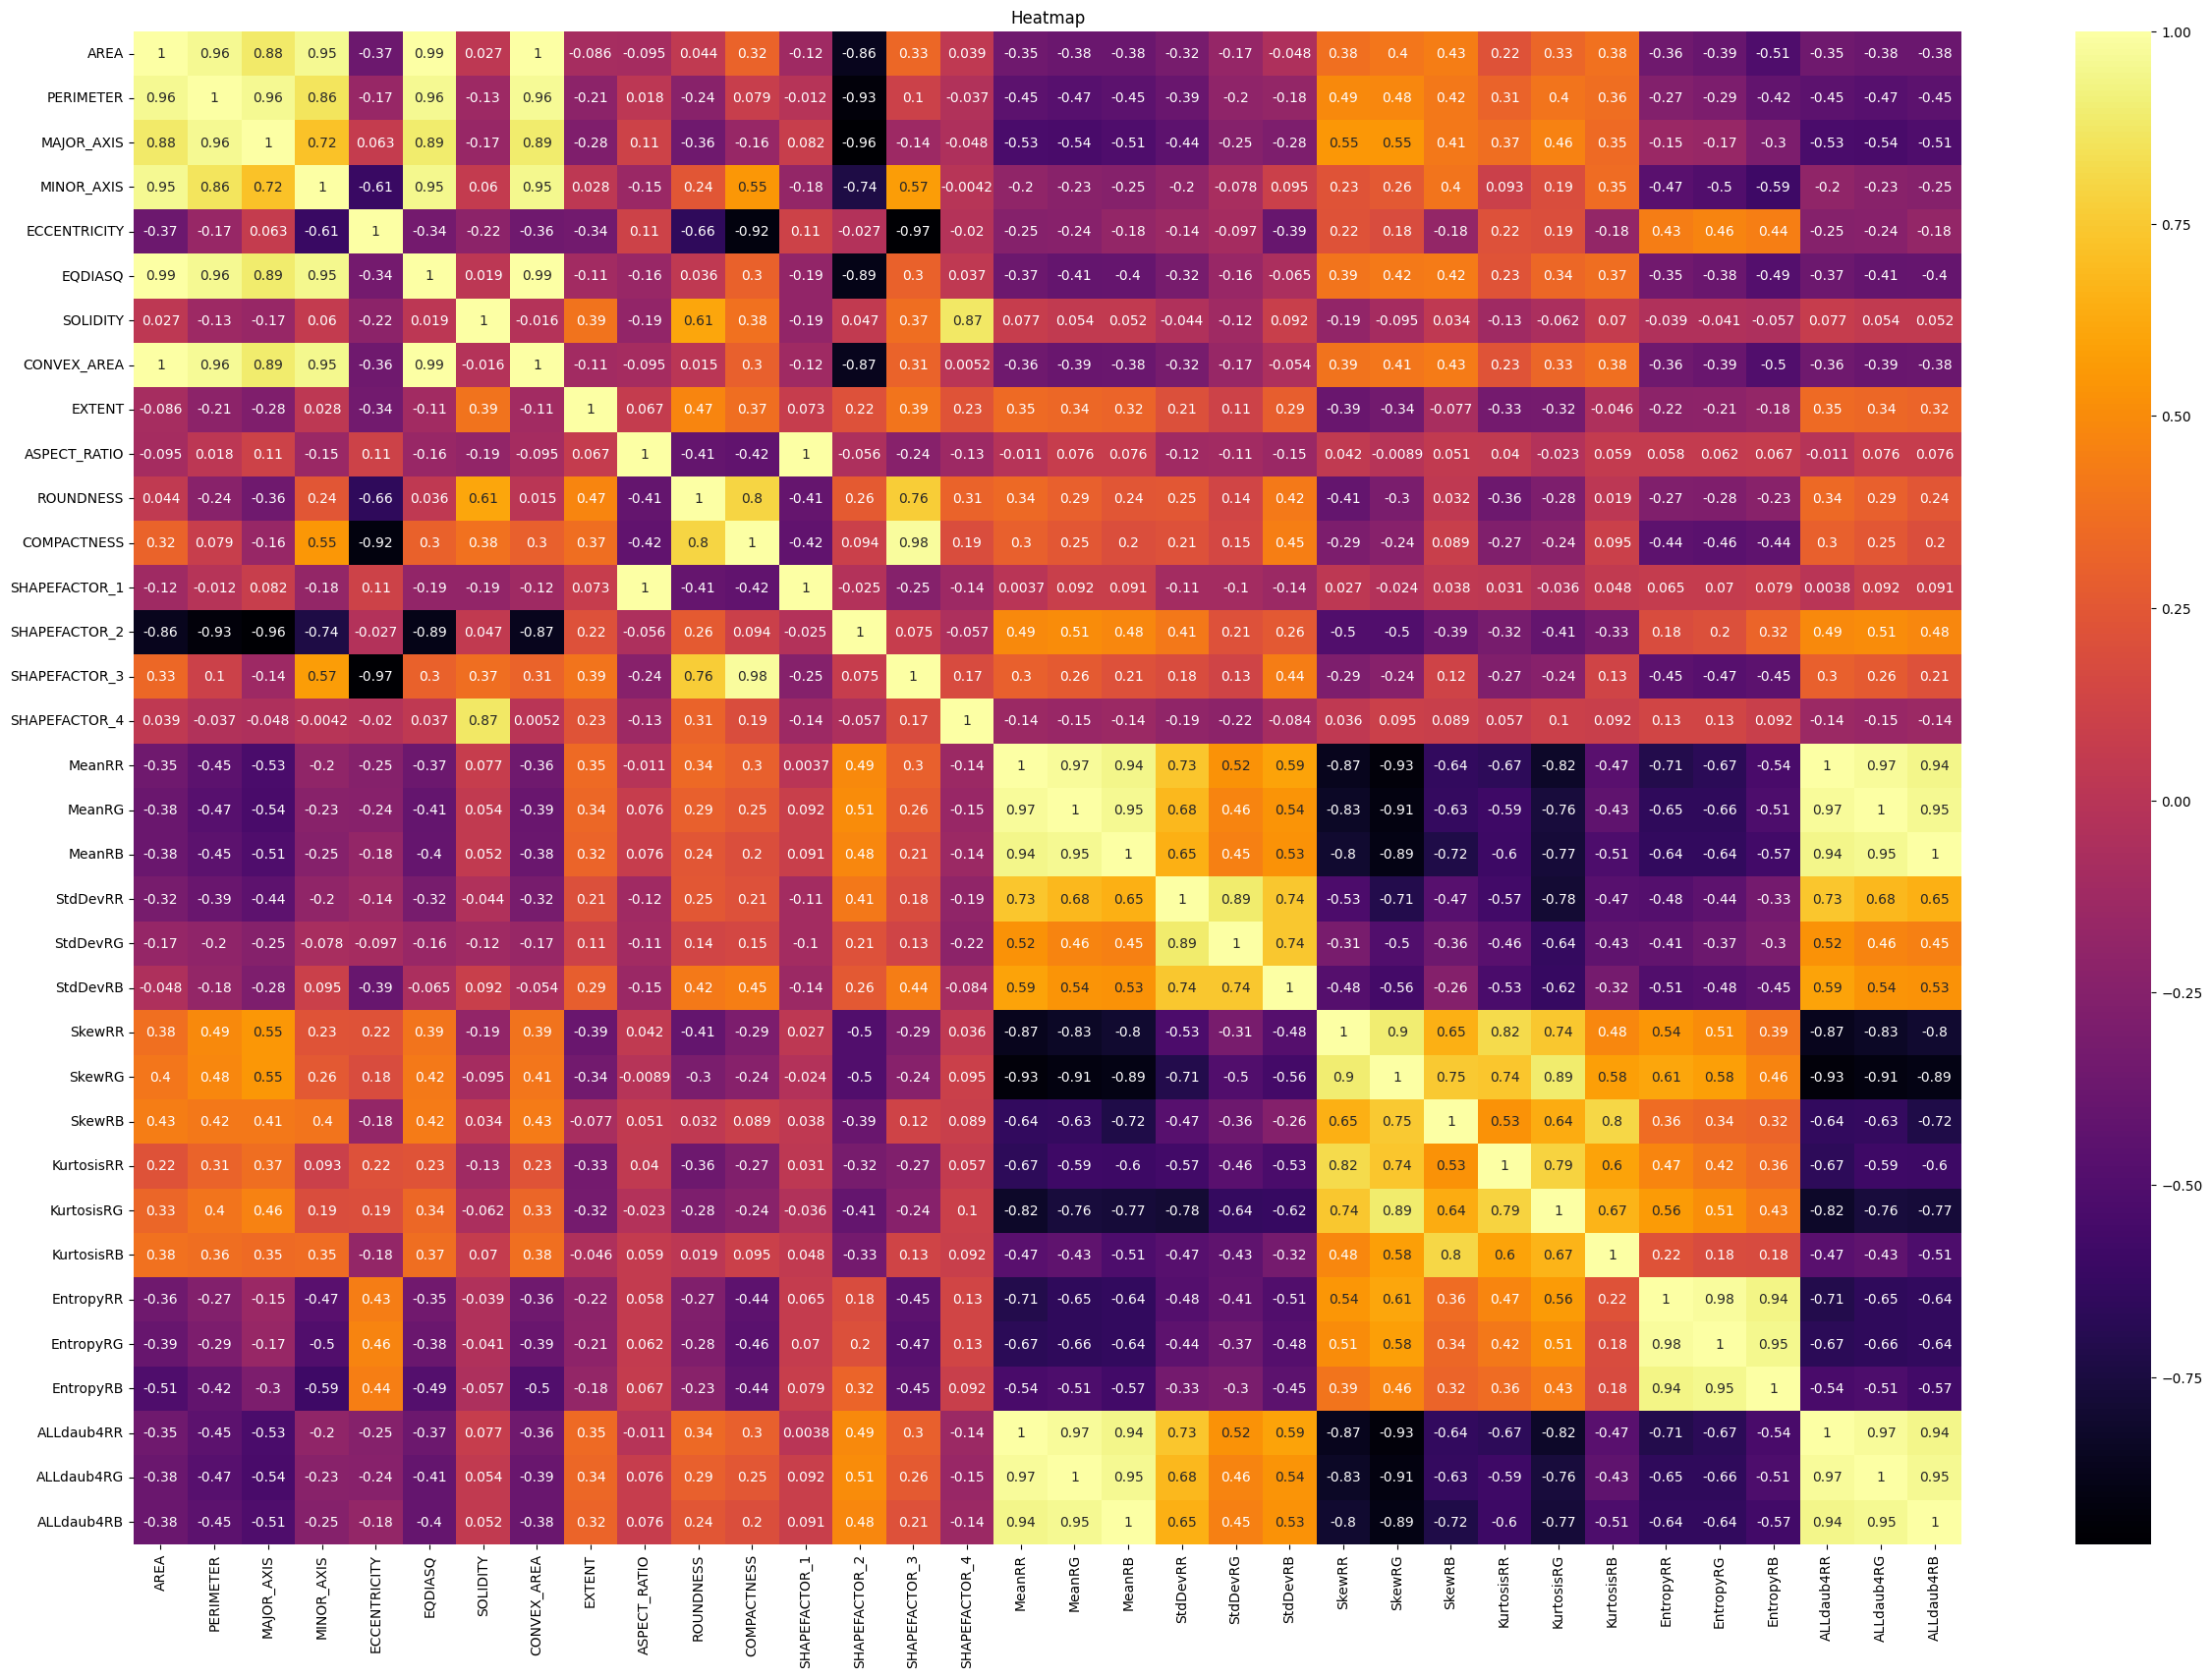

In [14]:

# Create a larger figure
plt.figure(figsize=(30, 20))

# Create a heatmap for the correlation matrix
# to change the colors of the palette use 'coolwarm', 'plasma', 'magma', 'inferno', 'cividis', 'viridis', 'twilight_shifted'
sns.heatmap(correlation_matrix, annot=True, cmap='inferno')
plt.title('Heatmap')
plt.show()

<h4 id="heading"><span style="background-color:#fcf3b9; color:#3d3710 ; display:fill;border-radius:5px; font-family:Georgia">🗄️ Outliers values </span></h4>


In [15]:
len(df_feature.columns)

34

In [16]:
#for the figure control, ipywidgets for creating interactive widgets, and IPython.display for output display.
import ipywidgets as widgets
from IPython.display import display, clear_output

# Create a list of column names
column_names = df_feature.columns.tolist()

# Create a toggle button for selecting columns
toggle_buttons = widgets.ToggleButtons(
    options=column_names,
    description='Select Column:',
    layout={'width': 'initial'}
)

# Output widget to display the plots
plot_output = widgets.Output()

# Function to update the plot based on the selected column
def update_plot(change):
    with plot_output:
        clear_output(wait=True)
        column = change['new']
        plt.figure(figsize=(8, 6))
        sns.boxplot(data=df_feature[column], palette="Set3")
        plt.title(f"Box Plot for {column}")
        plt.ylabel("Value")
        plt.xticks(rotation=45)
        plt.tight_layout()
        plt.show()

# Link the toggle buttons to the update function
toggle_buttons.observe(update_plot, names='value')

# Display the toggle buttons and plot output
display(widgets.VBox([toggle_buttons, plot_output]))

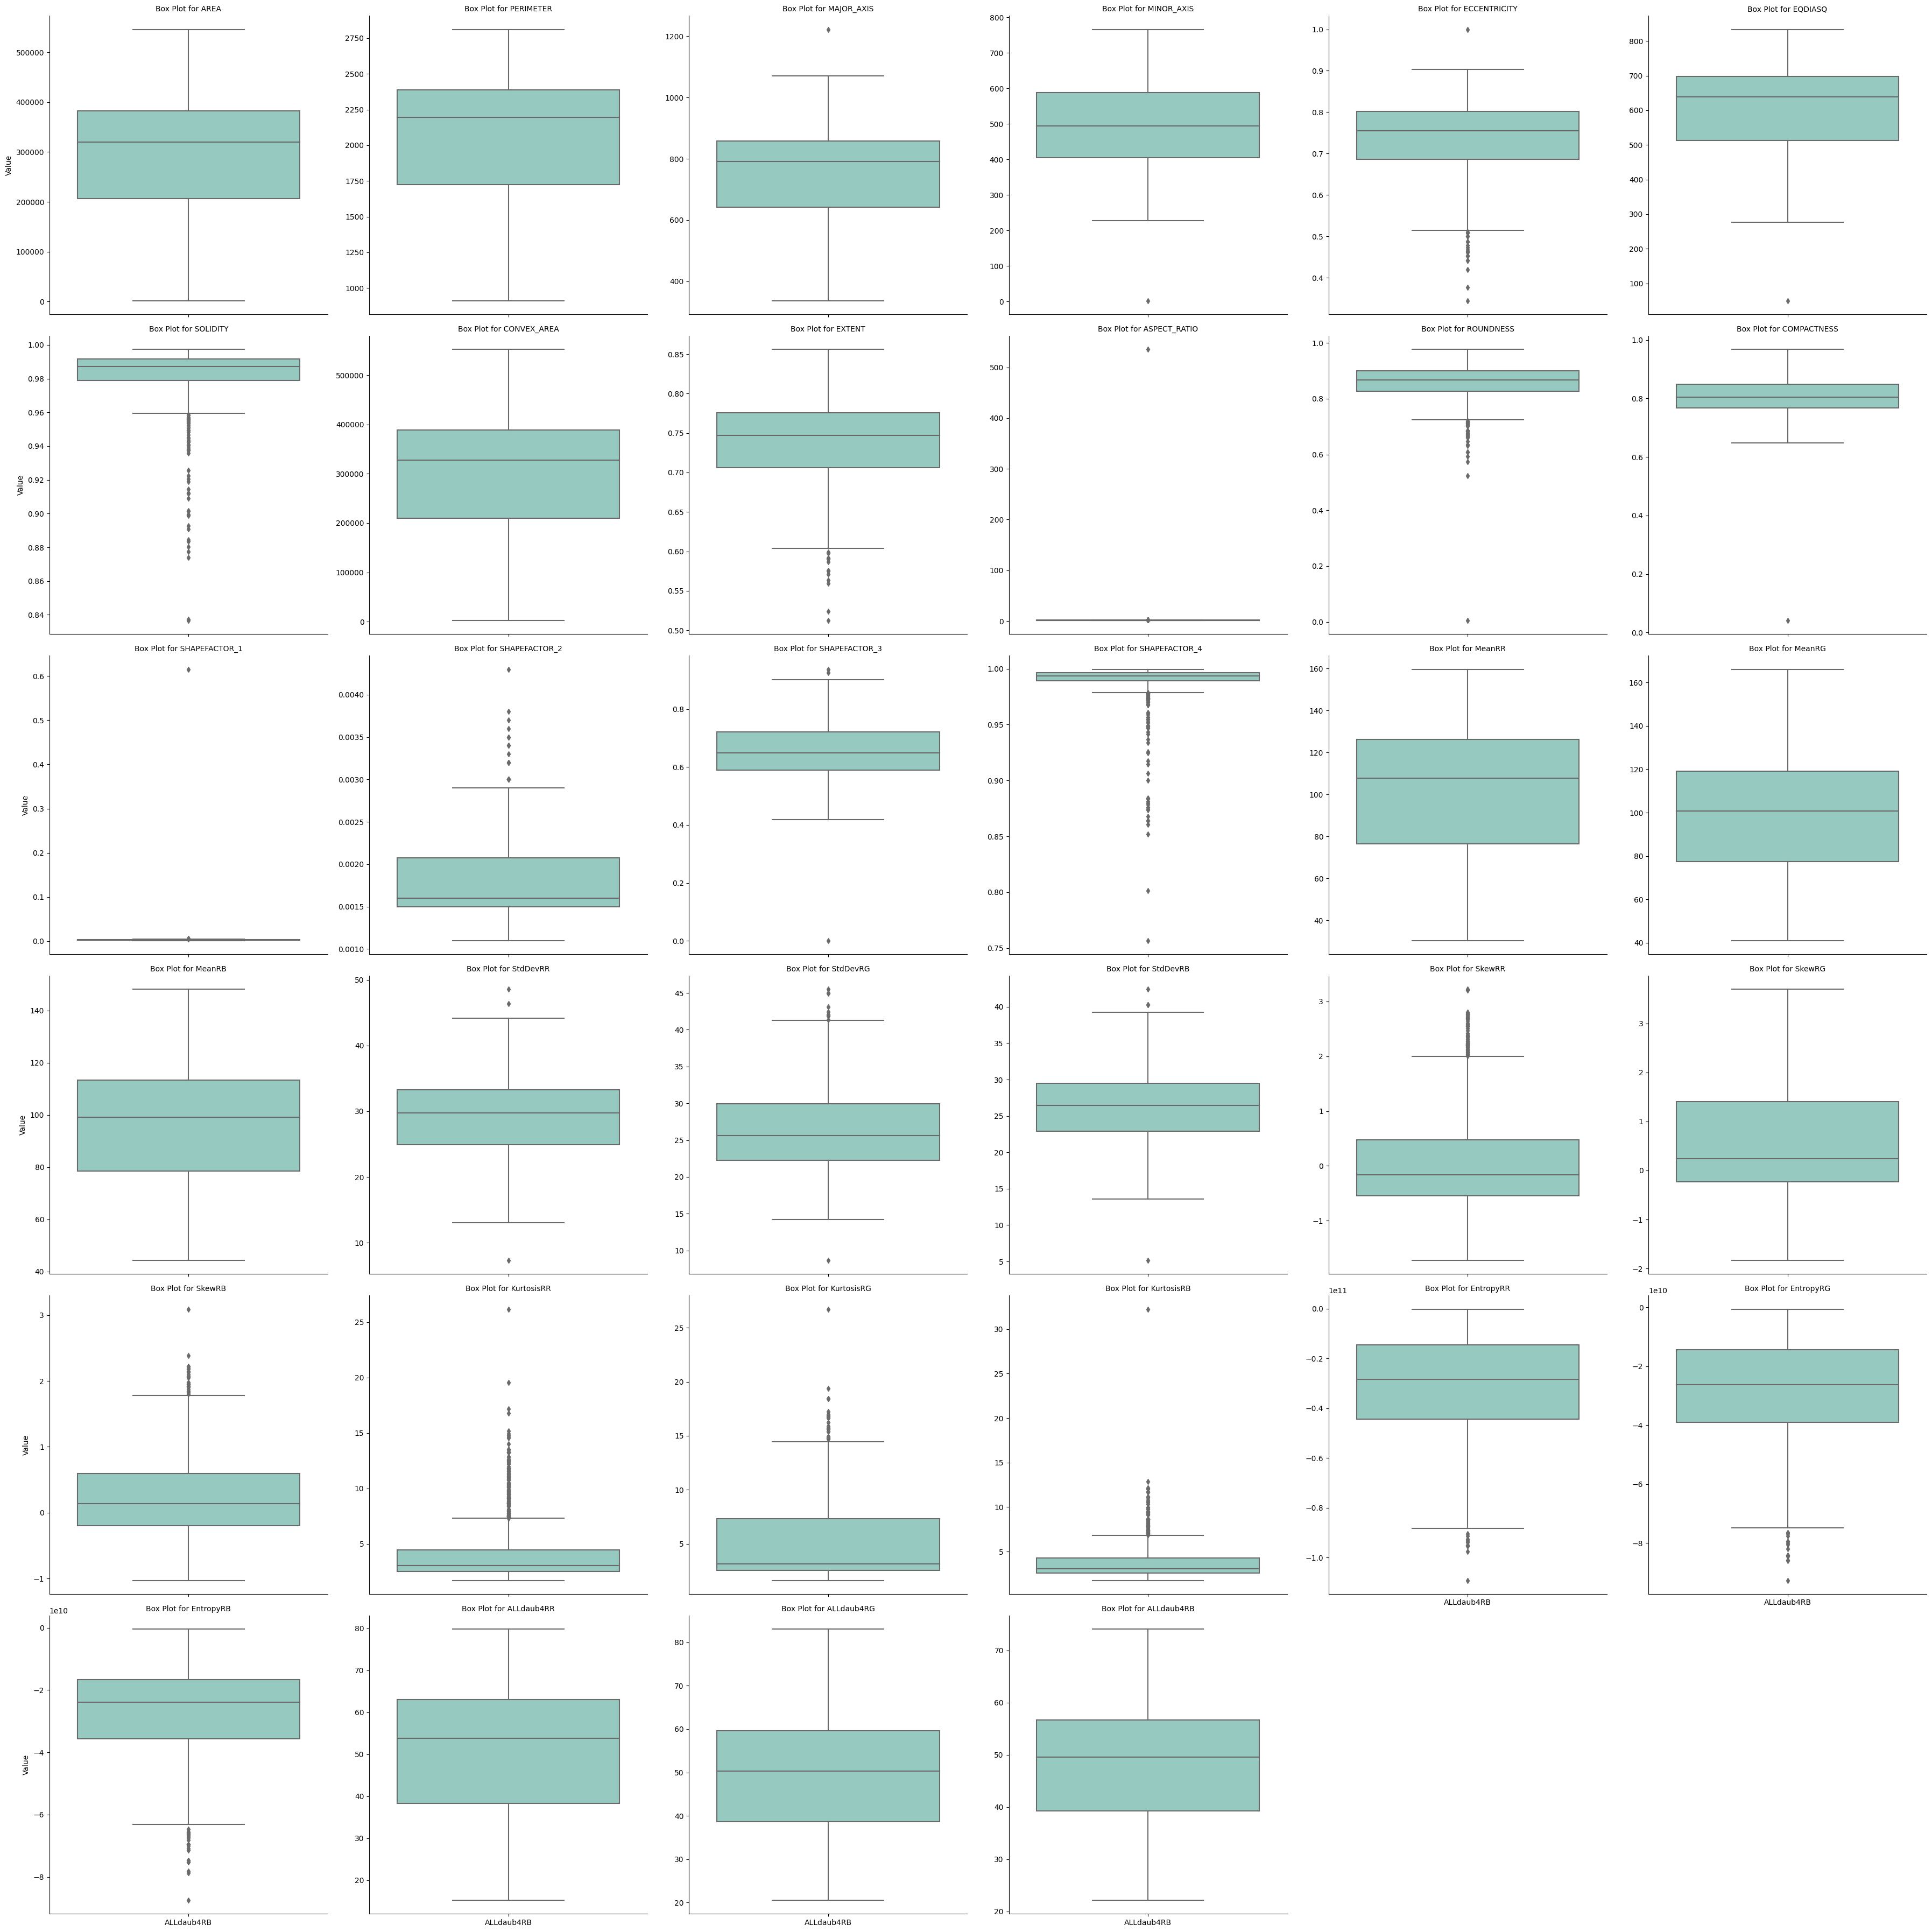

In [17]:
# Melt the DataFrame to create a long-form format suitable for FacetGrid
df_melted = df_feature.melt()

# Create a FacetGrid with box plots
g = sns.FacetGrid(df_melted, col="variable", col_wrap=6, sharey=False, height=6)
g.map_dataframe(sns.boxplot, x="variable", y="value", palette="Set3")

# Adjust titles and labels
g.set_titles(col_template="Box Plot for {col_name}")
g.set_axis_labels("", "Value")

plt.tight_layout()
plt.show()

In [18]:
# Calculate Z-scores for numerical columns
z_scores = stats.zscore(df_feature)

# Find outliers based on a Z-score threshold (e.g., 3)
outlier_threshold = 3
outliers = (abs(z_scores) > outlier_threshold).any(axis=1)

# Print the rows with outliers
print('The number of outliers with Z-scores in this dataset is:', len(df_feature[outliers]))

The number of outliers with Z-scores in this dataset is: 105


In [19]:
# Calculate the IQR for numerical columns
Q1 = df_feature.quantile(0.25)
Q3 = df_feature.quantile(0.75)
IQR = Q3 - Q1

# Find outliers based on the IQR method
outliers = ((df_feature < (Q1 - 1.5 * IQR)) | (df_feature > (Q3 + 1.5 * IQR))).any(axis=1)

# Print the rows with outliers
print('The number of outliers with IQR method in this dataset is:' ,df_feature[outliers].shape[0])
# raw_df[outliers]

The number of outliers with IQR method in this dataset is: 310


<h4 id="heading"><span style="background-color:#fcf3b9; color:#3d3710 ; display:fill;border-radius:5px; font-family:Georgia">📊 bar plot using seaborn</span></h4>


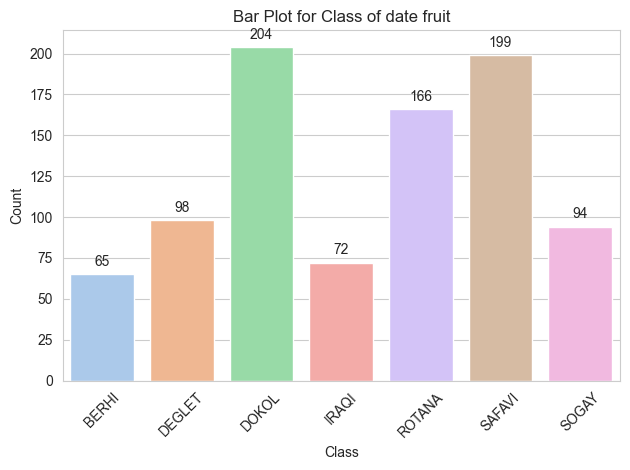

In [20]:
# Create a count plot for the 'Class' values with custom style
sns.set_style("whitegrid")  # Set the style to whitegrid
ax = sns.countplot(x=df_target, palette="pastel")

# Annotate the bars with their counts
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.0f'),
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', 
                xytext=(0, 9), 
                textcoords='offset points')

plt.xlabel("Class")  # Add x-axis label
plt.ylabel("Count")
plt.title("Bar Plot for Class of date fruit")
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()

<h5 id="heading"><span style="background-color:#fcb9d0; color:#3d3710 ; display:fill;border-radius:5px; font-family:Georgia">🗑️ Clean the missing categorical values </span></h5>

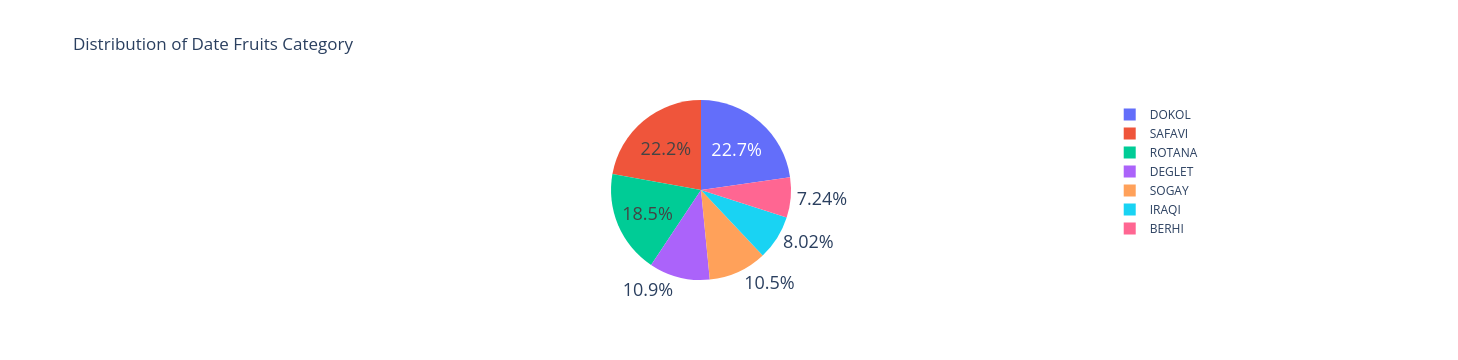

In [21]:
# Sample data
type_dict = df["Class"].value_counts().to_dict()
type_dict = {k: v for k, v in sorted(type_dict.items())}  # Sorting the dictionary
type_label = list(type_dict.keys())
type_value = list(type_dict.values())

# Create a pie chart using Plotly
fig = px.pie(values=type_value, names=type_label, title="Distribution of Date Fruits Category")
# Update layout to make the figure bigger
fig.update_traces(textfont_size=18)  # Adjust font size
# Show the plot
fig.show()

In [22]:
# Create a toggle button for selecting columns
toggle_buttons = widgets.ToggleButtons(
    options=column_names,
    description='Select Column to display the Distribution of the column by Class:',
    layout={'width': 'initial'}
)

# Output widget to display the plots
plot_output = widgets.Output()

# Function to update the plot based on the selected column
def update_plot(change):
    with plot_output:
        clear_output(wait=True)
        column = change['new']
        plt.figure(figsize=(12, 8))
        with sns.axes_style("white", rc={"axes.facecolor": "#ffffff"}):
            sns.displot(data=df, x=column, hue="Class", kind="kde", palette=colors, fill=True, legend=True,aspect=2)
        plt.title(f"Distribution of {column.capitalize()} by Class", size=18, fontweight="bold", color="#413D41")
        plt.tight_layout()
        plt.show()

# Link the toggle buttons to the update function
toggle_buttons.observe(update_plot, names='value')

# Display the toggle buttons and plot output
display(widgets.VBox([toggle_buttons, plot_output]))

<h3 id="heading"><span style="background-color:#cefffb; color:#1b4946 ; display:fill;border-radius:5px; font-family:cursive"> 🛠️ ⚙️ Preprocessing </span></h3>

<h4 id="heading"><span style="background-color:#fcf3b9; color:#3d3710 ; display:fill;border-radius:5px; font-family:Georgia"> ✂️🎛 Prepare dataset for training</span></h4>

Before go to the modeling part we need before to split datasets into training and testing data, for using metrics and evaluate the model

In [139]:
output = df['Class']
input = df.drop('Class', axis = 1)

# Call an encoder for transforming the output classes
l_encoder = LabelEncoder() # encoding
output = l_encoder.fit_transform(output)

# splitting the input and output to 2 part, one for training and other for testing
X_train, X_test, y_train, y_test = train_test_split(input, output, test_size = 0.3, stratify=output, random_state=42) 

# Let do some scaling and normalization for the input data to get ride from over and under fitting

# scaling using standardScaler function
scaler = StandardScaler() 
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
X_train = pd.DataFrame(X_train_scaled)
X_test = pd.DataFrame(X_test_scaled)

# # scaling using minmax_scale function
# X_train_scaled =  minmax_scale(X_train)
# X_test_scaled =  minmax_scale(X_test)
# X_train = pd.DataFrame(X_train_scaled)
# X_test = pd.DataFrame(X_test_scaled)

<h3 id="heading"><span style="background-color:#cefffb; color:#1b4946 ; display:fill;border-radius:5px; font-family:cursive"> 🛠️ ⚙️ Modeling  </span></h3>

In this section, we will try to define multiple __classification models__ such as:
- [x] Sklearn models
- [x] PyTorch model
- [x] TensorFlow model
- [x] Hyperparameters tuning


<h4 id="heading"><span style="background-color:#fcf3b9; 
                     color:#3d3710 ; 
                     display:fill;
                     border-radius:5px; 
                     font-family:Georgia"> 
    🛠️⚙️ Build and train models using sklearn models
</span></h4>

In [127]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, VotingClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score

In [128]:
X_train, X_test, y_train, y_test = train_test_split(input, output, test_size=0.3, stratify=output, random_state=42)
print(f"""
X_train shape: {X_train.shape}
X_test shape: {X_test.shape}
y_train shape: {y_train.shape}
y_test shape: {y_test.shape}
""")
# Initialize and train various classifiers
classifiers = {
    "Logistic Regression": LogisticRegression(),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(),
    "Gradient Boosting": GradientBoostingClassifier(),
    "SVM": SVC(),
    "K-Nearest Neighbors": KNeighborsClassifier(),
    "Neural Network": MLPClassifier(),
    # "Naive Bayes": MultinomialNB(),
    "Ensemble": VotingClassifier(estimators=[
        ('rf', RandomForestClassifier()),
        ('gb', GradientBoostingClassifier())
    ], voting='soft')
}


X_train shape: (628, 34)
X_test shape: (270, 34)
y_train shape: (628,)
y_test shape: (270,)



#### train using standarscaling

In [ ]:
score = pf.Da 

In [140]:
# train using minmax_scaling
# Convert input data to NumPy arrays
X_train = X_train.to_numpy()
X_test = X_test.to_numpy()

# Train and evaluate each classifier
for name, clf in classifiers.items():
    clf.fit(X_train, y_train)
    
    y_train_pred = clf.predict(X_train)
    train_accuracy = accuracy_score(y_train, y_train_pred)

    y_test_pred = clf.predict(X_test)
    test_accuracy = accuracy_score(y_test, y_test_pred)
    print(f"{name} - Train Accuracy: {train_accuracy:.4f} - Test Accuracy: {test_accuracy:.4f}")
    

Logistic Regression - Train Accuracy: 0.9475 - Test Accuracy: 0.9407
Decision Tree - Train Accuracy: 1.0000 - Test Accuracy: 0.8148
Random Forest - Train Accuracy: 1.0000 - Test Accuracy: 0.9000
Gradient Boosting - Train Accuracy: 1.0000 - Test Accuracy: 0.8926
SVM - Train Accuracy: 0.9347 - Test Accuracy: 0.9185
K-Nearest Neighbors - Train Accuracy: 0.9347 - Test Accuracy: 0.9111
Neural Network - Train Accuracy: 0.9697 - Test Accuracy: 0.9556
Ensemble - Train Accuracy: 1.0000 - Test Accuracy: 0.8926


#### train using minmax_scaling

In [136]:
# train using minmax_scaling
# Convert input data to NumPy arrays
X_train = X_train.to_numpy()
X_test = X_test.to_numpy()

# Train and evaluate each classifier
for name, clf in classifiers.items():
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    print(f"{name} - Accuracy: {accuracy:.4f}")

Logistic Regression - Accuracy: 0.9407
Decision Tree - Accuracy: 0.8259
Random Forest - Accuracy: 0.9185
Gradient Boosting - Accuracy: 0.8926
SVM - Accuracy: 0.9185
K-Nearest Neighbors - Accuracy: 0.9111
Neural Network - Accuracy: 0.9444
Ensemble - Accuracy: 0.8889


<h4 id="heading"><span style="background-color:#fcf3b9; color:#3d3710 ; display:fill;border-radius:5px; font-family:Georgia"> 🛠️⚙️ Build and train models using TensorFlow</span></h4>

In [80]:
import tensorflow as tf

In [72]:
model = tf.keras.Sequential()

In [73]:
input_layer = tf.keras.layers.Dense(4096, input_shape=(34,), activation ="relu")
model.add(input_layer)

for i in range(3):
    model.add(tf.keras.layers.Dense(4096, activation = "relu"))
    model.add(tf.keras.layers.Dropout(0.5))

model.add(tf.keras.layers.Dense(7, activation = "softmax"))

In [74]:
model.compile(optimizer = "adam", loss="sparse_categorical_crossentropy", metrics = ["accuracy"])

In [109]:
X = df.drop("Class", axis=1)
y = df.loc[:,"Class"] 
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X = pd.DataFrame(X_scaled)
lbe = LabelEncoder()
y = lbe.fit_transform(y)

In [110]:
X_train, X_temp, y_train, y_temp = train_test_split(X,y, train_size = 0.8)
X_val,X_test, y_val, y_test =  train_test_split(X_temp,y_temp, train_size = 0.5)

In [111]:
results = model.fit(X_train,y_train, epochs = 100, validation_data = (X_val,y_val))

Epoch 1/100
23/23 [==============================] - 19s 829ms/step - loss: 5.3442 - accuracy: 0.7256 - val_loss: 1.3139 - val_accuracy: 0.7222
Epoch 2/100
 8/23 [=========>....................] - ETA: 12s - loss: 2.3587 - accuracy: 0.7031

KeyboardInterrupt: 

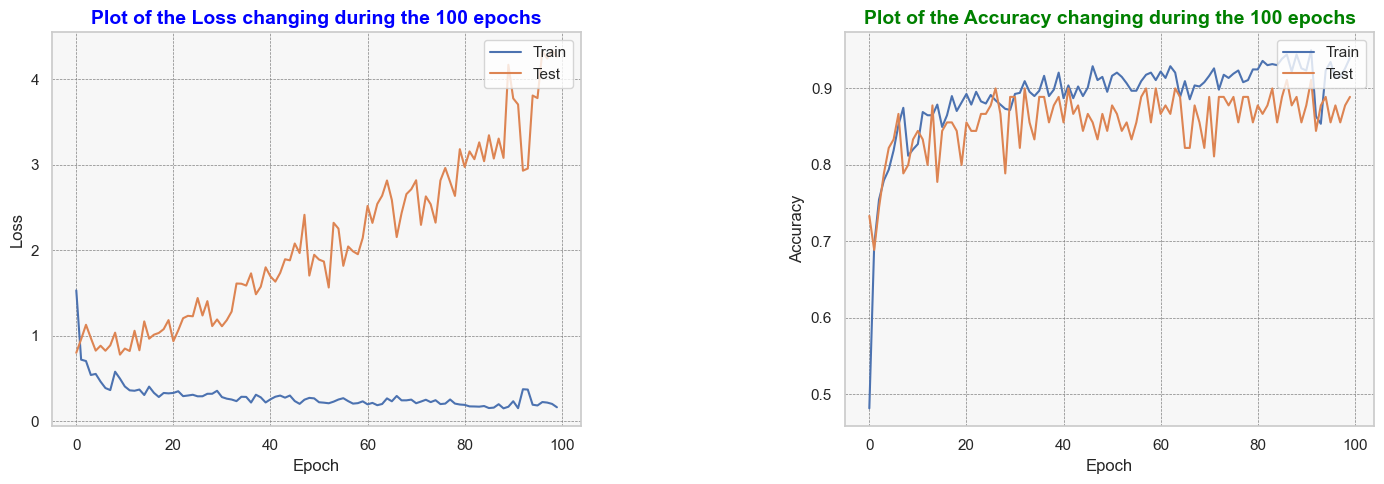

In [120]:
# Set Seaborn style
sns.set(style="whitegrid")
palette = sns.color_palette("pastel")

# Create a 1x2 grid of subplots
plt.figure(figsize=(14, 5))

# First plot: Loss
ax1 = plt.subplot(1, 2, 1)
sns.lineplot(data=results.history, x=range(len(results.history['loss'])), y='loss', label="Train", palette=palette)
sns.lineplot(data=results.history, x=range(len(results.history['val_loss'])), y='val_loss', label="Test", palette=palette)
plt.ylabel("Loss")
plt.xlabel("Epoch")
plt.title('Plot of the Loss changing during the 100 epochs', fontsize=14, fontweight='bold', color='blue')
plt.legend(loc='upper right')
plt.grid(color='gray', linestyle='--', linewidth=0.5)

# Customize plot color
ax1.set_facecolor('#F7F7F7')  # Set background color

# Second plot: Accuracy
ax2 = plt.subplot(1, 2, 2)
sns.lineplot(data=results.history, x=range(len(results.history['accuracy'])), y='accuracy', label="Train", palette=palette)
sns.lineplot(data=results.history, x=range(len(results.history['val_accuracy'])), y='val_accuracy', label="Test", palette=palette)
plt.ylabel("Accuracy")
plt.xlabel("Epoch")
plt.title('Plot of the Accuracy changing during the 100 epochs', fontsize=14, fontweight='bold', color='green')
plt.legend(loc='upper right')
plt.grid(color='gray', linestyle='--', linewidth=0.5)

# Customize plot color
ax2.set_facecolor('#F7F7F7')  # Set background color

# Adjust layout and show plots
plt.tight_layout()
# Adjust layout with space between the plots
plt.subplots_adjust(wspace=0.5)  # Adjust the width space as needed
plt.show()

In [79]:
test_result = model.test_on_batch(X_test,y_test)
print(test_result)

[0.29468438029289246, 0.9222221970558167]


<h4 id="heading"><span style="background-color:#fcf3b9; color:#3d3710 ; display:fill;border-radius:5px; font-family:Georgia"> 🛠️⚙️ model selection: Hyperparameters tuning</span></h4>

In [137]:
from sklearn.model_selection import GridSearchCV
# Define hyperparameter grids for each classifier
param_grids = {
    "Logistic Regression": {
        "C": [0.01, 0.1, 1, 10]
    },
    "Decision Tree": {
        "max_depth": [None, 10, 20],
        "min_samples_split": [2, 5, 10]
    },
    "Random Forest": {
        "n_estimators": [50, 100, 200],
        "max_depth": [None, 10, 20],
        "min_samples_split": [2, 5, 10]
    },
    "Gradient Boosting": {
        "n_estimators": [50, 100, 200],
        "learning_rate": [0.01, 0.1, 1],
        "max_depth": [3, 4, 5]
    },
    "SVM": {
        "C": [0.1, 1, 10],
        "kernel": ["linear", "rbf"]
    },
    "K-Nearest Neighbors": {
        "n_neighbors": [3, 5, 7],
        "weights": ["uniform", "distance"]
    },
    "Neural Network": {
        "hidden_layer_sizes": [(100,), (50, 50), (100, 50, 25)],
        "alpha": [0.0001, 0.001, 0.01]
    },
    "Ensemble": {
        # Parameters for the individual classifiers in the ensemble
        "rf__n_estimators": [50, 100],
        "gb__n_estimators": [50, 100],
        # Other hyperparameters for the ensemble itself
        "voting": ["soft"]
    }
}

# Create a dictionary to store the best models
best_models = {}

# Perform grid search for each classifier
for name, clf in classifiers.items():
    print(f"Tuning {name}")
    param_grid = param_grids[name]
    
    if name == "Ensemble":
        # For the ensemble, use the VotingClassifier wrapper as the estimator
        estimator = VotingClassifier(estimators=[
            ('rf', RandomForestClassifier()),
            ('gb', GradientBoostingClassifier())
        ], voting='soft')
    else:
        estimator = clf
    
    grid_search = GridSearchCV(estimator=estimator, param_grid=param_grid, scoring='accuracy', cv=5)
    grid_search.fit(X_train, y_train)
    
    best_models[name] = grid_search.best_estimator_
    
    print(f"Best Hyperparameters: {grid_search.best_params_}")
    print(f"Train Accuracy: {grid_search.best_score_:.4f}\n")

# Evaluate the best models on the test set
for name, best_model in best_models.items():
    y_pred = best_model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    print(f"{name} - Test Accuracy: {accuracy:.4f}")

Tuning Logistic Regression
Best Hyperparameters: {'C': 1}
Train Accuracy: 0.9172

Tuning Decision Tree
Best Hyperparameters: {'max_depth': 20, 'min_samples_split': 2}
Train Accuracy: 0.8217

Tuning Random Forest
Best Hyperparameters: {'max_depth': 20, 'min_samples_split': 5, 'n_estimators': 200}
Train Accuracy: 0.8886

Tuning Gradient Boosting
Best Hyperparameters: {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 200}
Train Accuracy: 0.8758

Tuning SVM
Best Hyperparameters: {'C': 1, 'kernel': 'linear'}
Train Accuracy: 0.9220

Tuning K-Nearest Neighbors
Best Hyperparameters: {'n_neighbors': 5, 'weights': 'distance'}
Train Accuracy: 0.8854

Tuning Neural Network
Best Hyperparameters: {'alpha': 0.0001, 'hidden_layer_sizes': (100,)}
Train Accuracy: 0.9299

Tuning Ensemble
Best Hyperparameters: {'gb__n_estimators': 100, 'rf__n_estimators': 100, 'voting': 'soft'}
Train Accuracy: 0.8854

Logistic Regression - Test Accuracy: 0.9407
Decision Tree - Test Accuracy: 0.8333
Random Forest - Te